In [1]:
import pandas as pd # importing pandas for data manupilation
import numpy as np # importing numpy for numerical operations
import plotly.express as px # importing plotly Express for interactive visualization
import plotly.graph_objects as go # importing plotly graph objects for advanced visualizations
import bokeh.plotting as bp # importing  bokeh for web-based interactive visualizations
import altair as alt # importing altair for declarative data visualization
import seaborn as sns # importing seaborn for statistical data visualization
import matplotlib.pyplot as plt # importing matplotlib for standard plottimg
from scipy import stats # importing skippy for statistical analysis
from statsmodels.tsa.arima.model import ARIMA # importing ARIMA model for time series forecasting
import geopandas as gpd # importing geopandas for handling spatial data
import folium # importing folium for interactive map visualizations

In [ ]:
# introduction to EDA
# loading a sample dataset
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

In [ ]:
#1.3.1 understanding data structure
print(df.head()) # displaying the first five rows of the dataset
print(df.info()) # displaying dataset structure and data types

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


In [ ]:
# 1.3.2 handling missing data
print(df.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [ ]:
# 1.3.3 # calculating summary statistics
print(df.describe()) # generating statistics such as mean,std,min,max,etc

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


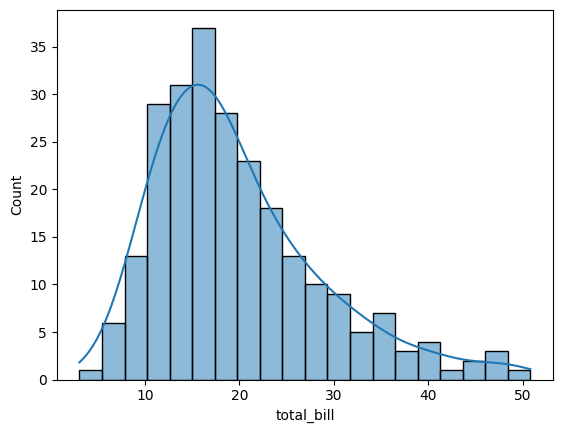

In [ ]:
# 1.3.4 #  data visualization basics
sns.histplot(df['total_bill'],bins=20, kde=True) # creating a histogram with kernel density estimate
plt.show() # displaying the plot

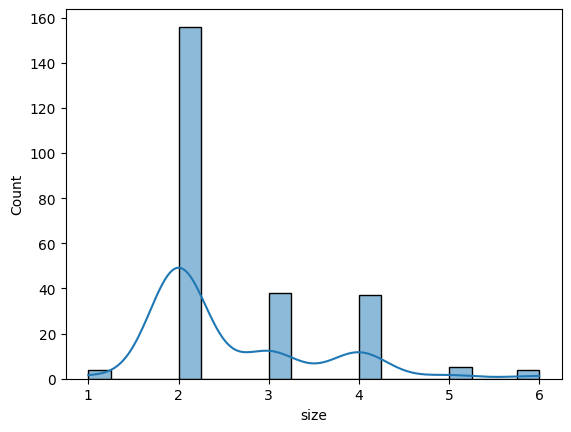

In [ ]:
# 1.3.4.1 #  data visualization basics
sns.histplot(df['size'],bins=20, kde=True) # creating a histogram with kernel density estimate
plt.show() # displaying the plot

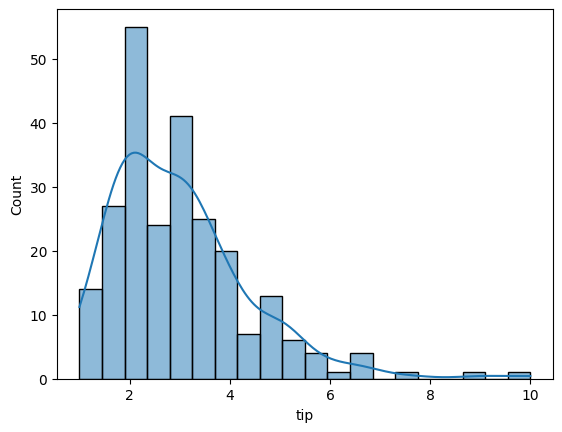

In [ ]:
# 1.3.4.2 #  data visualization basics
sns.histplot(df['tip'],bins=20, kde=True) # creating a histogram with kernel density estimate
plt.show() # displaying the plot

In [ ]:
# 2. Advanced Data Visualization
# 2.1.2 Creating Interactive Charts with Plotly
fig = px.scatter(df,x='total_bill',y='tip',color='sex',title='Total Bill vs Tip')  # Creating an interactive scatter plot
fig.show() # Displaying the scatter plot

In [ ]:
# 2.1 Advanced Data Visualization
# 2.1.2 Creating Interactive Charts with Plotly
fig = px.scatter(df,x='size',y='tip',color='sex',title='Total size vs Tip')  # Creating an interactive scatter plot
fig.show() # Displaying the scatter plot

In [ ]:
fig = px.bar(df,x='day',y='total_bill',color='sex',title='Total Bill by Day') # creating an interactive bar chart
fig.show() # Displaying the bar chart

In [ ]:
fig = px.line(df.groupby('day')['total_bill'].mean().reset_index(),x='day',y='total_bill',title='Avg Bill per Day') # creating an interactive line chart
fig.show() # Displaying the line chart

In [ ]:
# 3 Statistical Methods for EDA
# 3.1 Key Statistics
print("mean:",df['total_bill'].mean()) # calculating and printing the mean of 'total_bill'
print("variance:",df['total_bill'].var()) # calculating and printing the variance of 'total_bill'
print("correlation matrix:\n",df.select_dtypes(include=[np.number]).corr()) # filtering only numeric clumns

mean: 19.78594262295082
variance: 79.25293861397826
correlation matrix:
             total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


In [ ]:
# 3.2 Hypothesis testing
t_stat,p_value,=stats.ttest_ind(df[df['sex']=='male']['total_bill'],df[df['sex']=='female']['total_bill']) # performing a t-test to compare means between male and female
print(f"t-test p-value:{p_value}") # printing the p-value from t-test

t-test p-value:nan


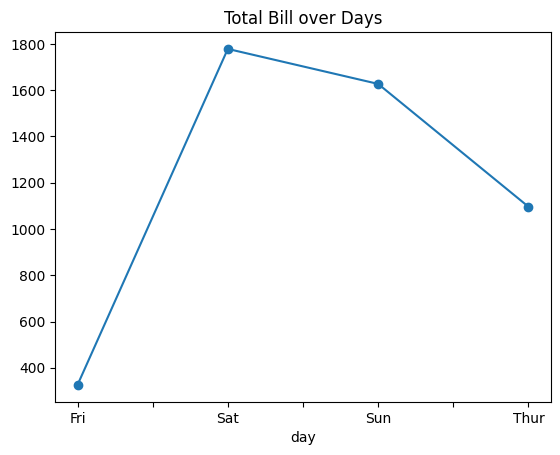

In [ ]:
# 4. Time series and data analysis
# 4.1 time series analysis
ts_data=df.groupby('day')['total_bill'].sum() # aggregating total bill amount over different days
ts_data.plot(title='Total Bill over Days',marker='o') # plotting total bill amouny over diffent days
plt.show() # displaying the time series plot